## Model Training

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data_set = pd.read_csv('data\insurance.csv')
data_set.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [3]:
# data_frame.drop(labels=['region'],axis=1,inplace=True)

In [4]:
X = data_set.drop(labels=['expenses'],axis=1)
Y = data_set[['expenses']]

In [5]:
Y

,expenses
0,16884.92
1,1725.55
2,4449.46
3,21984.47
4,3866.86
...,...
1333,10600.55
1334,2205.98
1335,1629.83
1336,2007.95


In [6]:
X

,age,sex,bmi,children,smoker,region
0,19,female,27.9,0,yes,southwest
1,18,male,33.8,1,no,southeast
2,28,male,33.0,3,no,southeast
3,33,male,22.7,0,no,northwest
4,32,male,28.9,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest
1334,18,female,31.9,0,no,northeast
1335,18,female,36.9,0,no,southeast
1336,21,female,25.8,0,no,southwest


In [7]:
# Define which columns should be ordinal-encoded and which should be scaled
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(exclude='object').columns

In [8]:
print('catagorical col:',categorical_cols)
print('numerical col:',numerical_cols)

catagorical col: Index(['sex', 'smoker', 'region'], dtype='object')
numerical col: Index(['age', 'bmi', 'children'], dtype='object')


In [9]:
# df['smoker'] = df['smoker'].replace({'yes': 1, 'no': 0})
# df['sex'] = df['sex'].replace({'male': 1, 'female': 0})

In [10]:
from sklearn.impute import SimpleImputer # Handling missing values
from sklearn.preprocessing import StandardScaler # Handing feature scaling
from sklearn.preprocessing import OneHotEncoder # for encoding

#pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


In [11]:
# sex_catagory = ['male','female']
# smoker_catagory = ['yes','no']

In [12]:
#numerical pipeline
num_pipeline = Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler(with_mean=False))

    ]

)

#Catagorical pipeline
cat_pipeline = Pipeline(
    steps= [
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehotencoder',OneHotEncoder(handle_unknown='ignore')),
        ('scaler',StandardScaler(with_mean=False))

    ]
)

# Combine both the pipeline
preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,numerical_cols),
('cat_pipeline',cat_pipeline,categorical_cols)
])

In [13]:
# Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.2,random_state=30)

In [14]:
X_train = pd.DataFrame(preprocessor.fit_transform(X_train), columns=preprocessor.get_feature_names_out())

X_test = pd.DataFrame(preprocessor.transform(X_test),columns= preprocessor.get_feature_names_out())

In [15]:
X_test.head()

,num_pipeline__age,num_pipeline__bmi,num_pipeline__children,cat_pipeline__sex_female,cat_pipeline__sex_male,cat_pipeline__smoker_no,cat_pipeline__smoker_yes,cat_pipeline__region_northeast,cat_pipeline__region_northwest,cat_pipeline__region_southeast,cat_pipeline__region_southwest
0,3.558526,5.322460,0.833494,0.000000,2.000031,0.000000,2.482766,2.369856,0.000000,0.0,0.000000
1,2.135116,5.174156,0.833494,0.000000,2.000031,2.482766,0.000000,0.000000,0.000000,0.0,2.331603
2,2.490968,4.465593,0.833494,0.000000,2.000031,2.482766,0.000000,0.000000,0.000000,0.0,2.331603
3,2.277457,2.933120,1.666988,2.000031,0.000000,0.000000,2.482766,0.000000,2.331603,0.0,0.000000
4,3.700867,6.047501,0.000000,0.000000,2.000031,2.482766,0.000000,0.000000,0.000000,0.0,2.331603


In [16]:
X_train.head()

,num_pipeline__age,num_pipeline__bmi,num_pipeline__children,cat_pipeline__sex_female,cat_pipeline__sex_male,cat_pipeline__smoker_no,cat_pipeline__smoker_yes,cat_pipeline__region_northeast,cat_pipeline__region_northwest,cat_pipeline__region_southeast,cat_pipeline__region_southwest
0,3.131503,6.096935,0.833494,2.000031,0.000000,2.482766,0.0,0.000000,2.331603,0.000000,0.0
1,1.565752,5.223590,0.000000,0.000000,2.000031,2.482766,0.0,2.369856,0.000000,0.000000,0.0
2,2.135116,5.207112,2.500482,0.000000,2.000031,2.482766,0.0,0.000000,0.000000,2.221773,0.0
3,4.412573,6.080457,0.833494,2.000031,0.000000,2.482766,0.0,2.369856,0.000000,0.000000,0.0
4,1.850434,4.811635,0.833494,0.000000,2.000031,2.482766,0.0,0.000000,0.000000,2.221773,0.0


In [17]:
# Model training
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# Model Training

In [18]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [19]:
## Train multiple models

models={
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'Elasticnet':ElasticNet(),
    'Random_forest_Regressor' : RandomForestRegressor(random_state = 42, 
                           max_depth = 5, 
                           n_jobs = -1, 
                           min_samples_leaf = 10),
    'Adaboost': AdaBoostRegressor(),
    'Gradient_boost': GradientBoostingRegressor(n_estimators=400, 
                              max_depth=5, 
                            #   loss='squared_error',
                              min_samples_split=2,
                              learning_rate=0.1
                              )
}
trained_model_list=[]
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,Y_train)

    #Make Predictions
    Y_pred=model.predict(X_test)

    mae, rmse, r2_square=evaluate_model(Y_test,Y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Training Performance')
    print("RMSE:",rmse)
    print("MAE:",mae)
    print("R2 score",r2_square*100)

    r2_list.append(r2_square)
    
    print('='*35)
    print('\n')

LinearRegression
Model Training Performance
RMSE: 6085.568181619563
MAE: 4189.941539179104
R2 score 75.99130550837145


Lasso
Model Training Performance
RMSE: 6085.412977706289
MAE: 4190.698085909974
R2 score 75.99253010916802


Ridge
Model Training Performance
RMSE: 6085.487100538443
MAE: 4190.878722072012
R2 score 75.99194526389779


Elasticnet
Model Training Performance
RMSE: 6596.508175430824
MAE: 4639.689539417342
R2 score 71.7905583499094


Random_forest_Regressor
Model Training Performance
RMSE: 4758.808902965394
MAE: 2583.506606476735
R2 score 85.31875754187608


Adaboost
Model Training Performance
RMSE: 5048.6684131215125
MAE: 3937.046541569204
R2 score 83.4758177532334


Gradient_boost
Model Training Performance
RMSE: 5882.527199360694
MAE: 3339.6283610517717
R2 score 77.56664814612158




###  Esemble techniches are performing well so hyperparameter tune than pickup best performing model 
 

In [20]:
from sklearn.model_selection import GridSearchCV

#### Random_forest_regressor

In [22]:
from sklearn.model_selection import GridSearchCV

# Create the Random Forest Regressor
rf = RandomForestRegressor()

# Define the hyperparameters and values to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30,40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Use GridSearchCV to search for best hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)



Fitting 5 folds for each of 405 candidates, totalling 2025 fits
Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


In [23]:
# Get the best model
best_rf = grid_search.best_estimator_

# Evaluate the model on test data
test_score = best_rf.score(X_test, Y_test)
print("Test R2 score of the best model:", test_score)


Test R2 score of the best model: 0.8367655855725427


In [26]:
y_pred = best_rf.predict(X_test)
mse = mean_squared_error(Y_test, y_pred)
print("Mean Squred Error: ",mse)

Mean Squred Error:  25179403.961494382


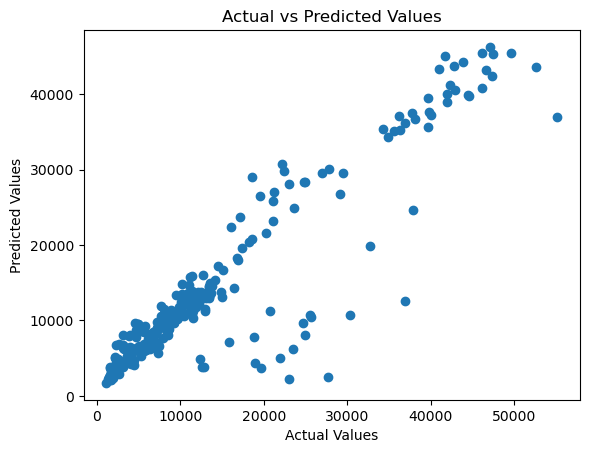

In [27]:
import matplotlib.pyplot as plt

plt.scatter(Y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


## Adaboost Regressor

In [32]:
from sklearn.tree import DecisionTreeRegressor
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1,0.3, 0.5,0.8, 1.0]
   
}

base_estimator = DecisionTreeRegressor()  # You can specify your base estimator here

ada_boost = AdaBoostRegressor()

grid_search = GridSearchCV(estimator=ada_boost, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 0.3, 0.5, 0.8, 1.0],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [33]:
best_params = grid_search.best_params_
print(best_params)

{'learning_rate': 0.01, 'n_estimators': 100}


In [34]:
best_adaboost= grid_search.best_estimator_

In [36]:
y_pred = best_adaboost.predict(X_test)

In [37]:
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
print("mean Squered Error:",mse)
print("r2_score: ",r2)

mean Squered Error: 24141117.361985326
r2_score:  0.8434966466150486


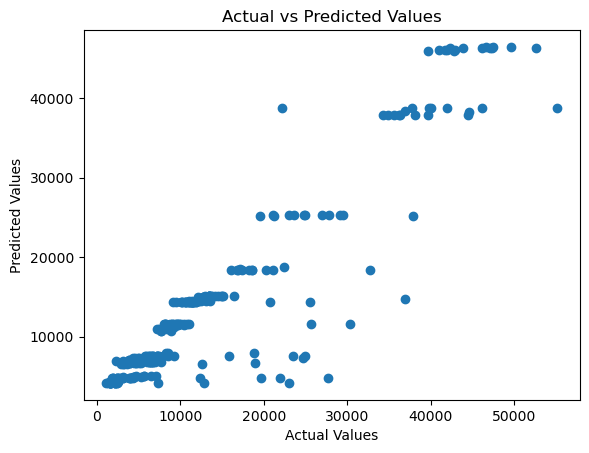

In [38]:
import matplotlib.pyplot as plt

plt.scatter(Y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()
